<a href="https://colab.research.google.com/github/manveethjain8/Machine-Learning/blob/main/Lasso_and_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [39]:
df = pd.read_csv(r"CO2 Emissions_Canada.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [40]:
X = df.drop(columns=['CO2 Emissions(g/km)','Make', 'Model', 'Fuel Consumption Comb (mpg)'])
y = df['CO2 Emissions(g/km)']
X

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6
...,...,...,...,...,...,...,...,...
7380,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4
7381,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9
7382,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3
7383,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9


In [41]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lasso Regression

In [43]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ])),
    ('regressor', Lasso())
])

In [44]:
pipeline.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, pipeline.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, pipeline.predict(X_train))}")

Train MSE: 83.14577408614606
Train R2: 0.9756780654747395


In [45]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 89.00979841455126
Test R2: 0.9741222557889685


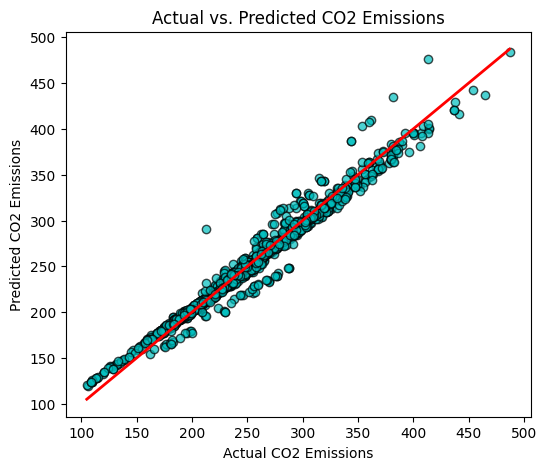

In [46]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()

In [47]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ])),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('regressor', Lasso(max_iter=5000)) # Increased max_iter to aid convergence
])

In [48]:
pipeline.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, pipeline.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, pipeline.predict(X_train))}")

Train MSE: 15.929454631674925
Train R2: 0.9953402905098545


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2869.470379146165, tolerance: 2019.6799427725111
  model = cd_fast.sparse_enet_coordinate_descent(


In [49]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 21.20889784440379
Test R2: 0.9938339548769761


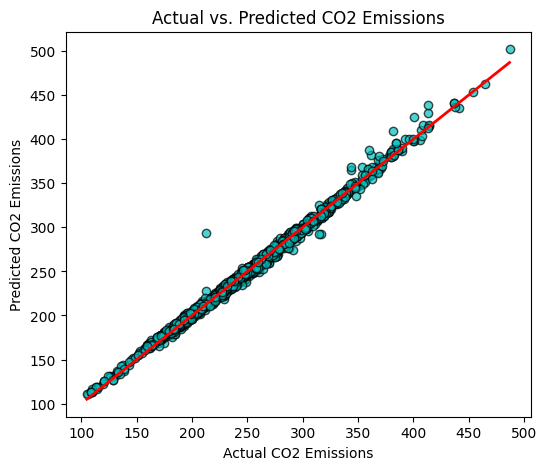

In [50]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()

Ridge Regression


In [51]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ])),
    ('regressor', Ridge())
])

In [52]:
pipeline.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, pipeline.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, pipeline.predict(X_train))}")

Train MSE: 25.31628035421959
Train R2: 0.9925944412693721


In [53]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 29.461523168354095
Test R2: 0.9914346760222141


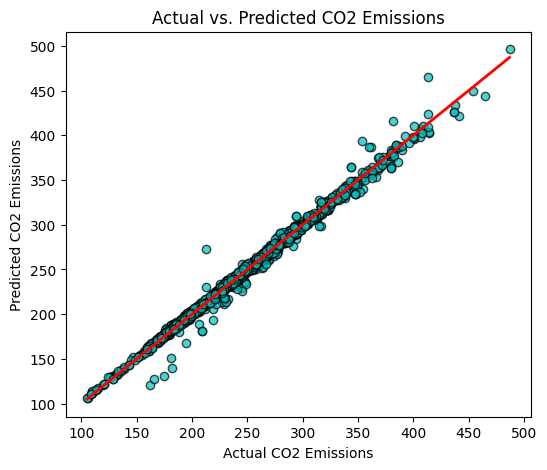

In [54]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()

In [55]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ])),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('regressor', Lasso(max_iter=5000)) # Increased max_iter to aid convergence
])

In [56]:
pipeline.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, pipeline.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, pipeline.predict(X_train))}")

Train MSE: 15.929454631674925
Train R2: 0.9953402905098545


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2869.4703791461943, tolerance: 2019.6799427725111
  model = cd_fast.sparse_enet_coordinate_descent(


In [57]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 21.20889784440379
Test R2: 0.9938339548769761


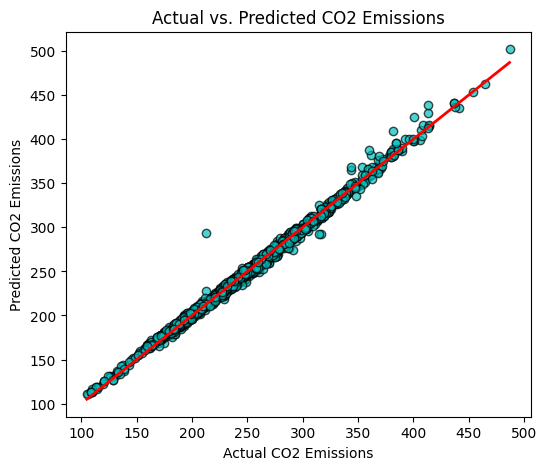

In [58]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()